In [25]:
#load the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('./dataset/training_set',target_size=(50,50),batch_size=32,class_mode='binary')


Found 8000 images belonging to 2 classes.


In [6]:
#set up the cnn model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
#卷积层
model.add(Conv2D(32,(3,3),input_shape=(50,50,3),activation='relu'))
#池化层
model.add(MaxPool2D(pool_size=(2,2)))
#卷积层
model.add(Conv2D(32,(3,3),activation='relu'))
#池化层
model.add(MaxPool2D(pool_size=(2,2)))
#flattening layer
model.add(Flatten())
#FC layer
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [7]:
#configure the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               495744    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

![cnn_structure](structure.jpg)

In [9]:
#train the model
model.fit_generator(training_set,epochs=20)

f:\anaconda\envs\imooc_ai1\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
250/250 [==============================] - 13s 50ms/step - loss: 0.6806 - accuracy: 0.5618
Epoch 2/20
250/250 [==============================] - 12s 50ms/step - loss: 0.5705 - accuracy: 0.7024
Epoch 3/20
250/250 [==============================] - 12s 50ms/step - loss: 0.5043 - accuracy: 0.7525
Epoch 4/20
250/250 [==============================] - 14s 55ms/step - loss: 0.4427 - accuracy: 0.7897
Epoch 5/20
250/250 [==============================] - 13s 53ms/step - loss: 0.4153 - accuracy: 0.8117
Epoch 6/20
250/250 [==============================] - 13s 53ms/step - loss: 0.3551 - accuracy: 0.8463
Epoch 7/20
250/250 [==============================] - 13s 52ms/step - loss: 0.3172 - accuracy: 0.8678
Epoch 8/20
250/250 [==============================] - 13s 52ms/step - loss: 0.2488 - accuracy: 0.8952
Epoch 9/20
250/250 [==============================] - 13s 52ms/step - loss: 0.2361 - accuracy: 0.9030
Epoch 10/20
250/250 [==============================] - 13s 50ms/step - loss: 0.159

In [11]:
#accuracy on the training data
accuracy_train = model.evaluate_generator(training_set)
accuracy_train1 = model.evaluate(training_set)
print(accuracy_train1,accuracy_train)

f:\anaconda\envs\imooc_ai1\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


250/250 [==============================] - 8s 33ms/step - loss: 8.1564e-04 - accuracy: 1.0000
[0.0008156413678079844, 1.0] [0.0008156413678079844, 1.0]


In [12]:
#accuracy on the test data
test_set = train_datagen.flow_from_directory('./dataset/test_set',target_size=(50,50),batch_size=32,class_mode='binary')

accuracy_test = model.evaluate_generator(test_set)
print(accuracy_test)

Found 2000 images belonging to 2 classes.
[1.4744036197662354, 0.7699999809265137]


In [23]:
#load single image
from keras.preprocessing.image import load_img, img_to_array
pic_dog = 'dog.jpg'
pic_dog = load_img(pic_dog,target_size=(50,50))
print(type(pic_dog))
pic_dog = img_to_array(pic_dog)
pic_dog = pic_dog/255
pic_dog = pic_dog.reshape(1,50,50,3)
result = model.predict_classes(pic_dog)
print(result)

<class 'PIL.Image.Image'>
[[1]]


In [20]:
pic_cat = 'cat1.jpg'
pic_cat = load_img(pic_cat,target_size=(50,50))
pic_cat = img_to_array(pic_cat)
pic_cat = pic_cat/255
pic_cat = pic_cat.reshape(1,50,50,3)
result = model.predict_classes(pic_cat)
print(result)

[[0]]


In [21]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

f:\anaconda\envs\imooc_ai1\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


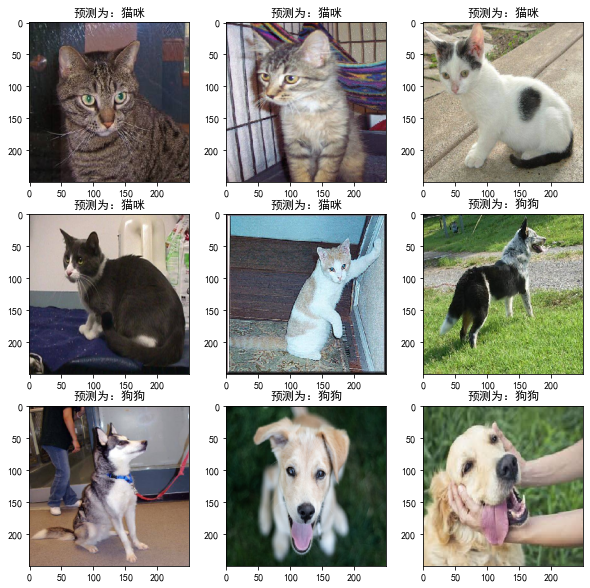

In [24]:
# make prediction on multiple images
import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
a = [i for i in range(1,10)]
fig = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.jpg'
    img_ori = load_img(img_name, target_size=(50, 50))
    img = img_to_array(img_ori)
    img = img.astype('float32')/255
    img = img.reshape(1,50,50,3)
    result = model.predict_classes(img)
    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫咪')
plt.show()